## 예제

1. test_csv 폴더에 있는 '유통 +업종 +트렌드 1901 2109 로드
2. 각 컬럼의 이름을 ['기준연월', '업종', '성별', 연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자, 2는 여자로 변, 9가 있다면 9는 무관
5. 남,녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력


In [154]:
import pandas as pd

In [155]:
test = pd.read_csv('../230407/test_csv/test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding = 'euc-kr')

In [156]:
test.columns = ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액' ]
test

# 판다스에서 지수표현 없애기
pd.options.display.float_format = '{:2f}'.format

In [157]:
test['기준연월'] = pd.to_datetime(test['기준연월'], format = "%Y%m")
test

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6283353303.000000
2644,2021-09-01,편의점,2,60,243768,1997441975.000000
2645,2021-09-01,편의점,2,70,40523,352420260.000000
2646,2021-09-01,편의점,2,80,6349,53334882.000000


In [158]:
# 인덱스를 기준연월로 설정
test.set_index('기준연월', inplace = True)

In [159]:
# 괴상한 데이터 
test['연령대'].value_counts()

연령대
10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: count, dtype: int64

In [84]:
# 성별 컬럼에서 1은 남자 2는 여자 9는 무관
#case1 
def change(x):
    if x == 1 :
        result = '남자'
    elif x == 2:
        result = '여자'
    elif x == 9:
        result = "무관"
    else :
        result = "-"
    return result

test['성별'] = test['성별'].apply(change)

test


        

,업종,성별,연령대,총이용건수,총이용금액
기준연월,,,,,
2019-01-01,백화점,남자,1,1,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000
2019-01-01,백화점,남자,20,45173,4747711001.000000
2019-01-01,백화점,남자,30,271858,27918261543.000000
2019-01-01,백화점,남자,40,391109,37911486656.000000
...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000
2021-09-01,편의점,여자,60,243768,1997441975.000000
2021-09-01,편의점,여자,70,40523,352420260.000000


In [88]:
# 연도 파생변수 생성
test['연도'] = test.index.strftime('%Y')

In [89]:
test

,업종,성별,연령대,총이용건수,총이용금액,연도
기준연월,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019
2019-01-01,백화점,남자,10,379,19458720.000000,2019
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019
...,...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000,2021
2021-09-01,편의점,여자,60,243768,1997441975.000000,2021
2021-09-01,편의점,여자,70,40523,352420260.000000,2021


In [91]:
# 건당 이용금액 파생변수 생성
# 총이용금액 / 총이용건수

test['건당이용금액'] = test['총이용금액'] / test['총이용건수']

test.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


<Axes: xlabel='연도,성별'>

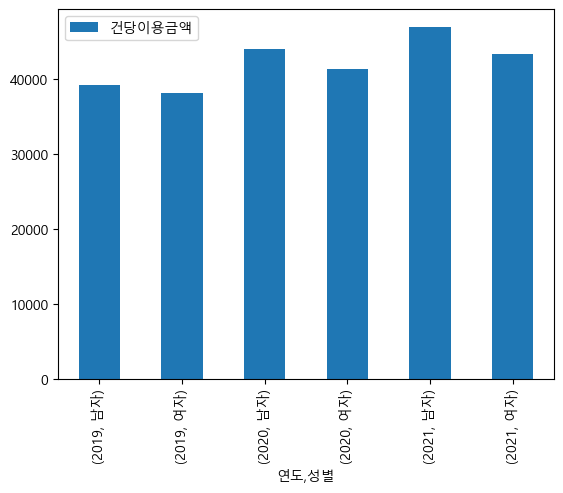

In [100]:
(test[['연도','성별','건당이용금액']].groupby(['연도','성별']).mean()).plot.bar()

In [99]:
# 그래프에서 한글 꺠짐 방지
import matplotlib.pyplot as plt
import platform # MAC 아니면 여기까지해도 됨

if platform.system() == 'Darwin' : # MAC인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [103]:
pivot = pd.pivot_table(
    test,
    index = '연도',
    columns = '성별',
    aggfunc = 'mean',
    values = '건당이용금액'
)

<Axes: xlabel='연도'>

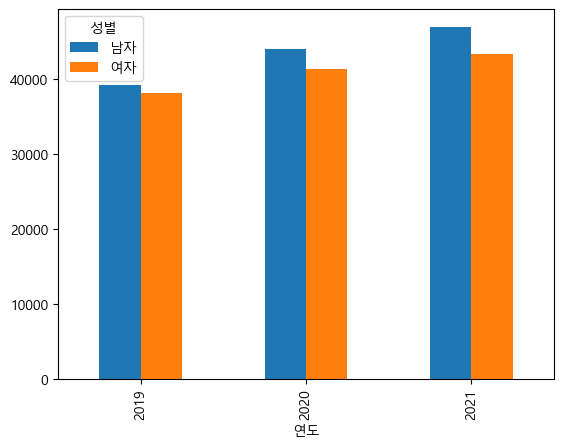

In [105]:
pivot.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
    1. 오프라인 데이터 df를 월별로 그룹화 총 이용금액의 합계
        1-1. 기준년월을 시계열로 설정
    2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
        2-1. 인덱스는 기준년월을 시계열로 변경한 데이터로 설정

In [106]:
test.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [109]:
group_data = test.groupby(test.index).sum()['총이용금액']
group_data

기준연월
2019-01-01   871763992837.000000
2019-02-01   775597878513.000000
2019-03-01   902760336419.000000
2019-04-01   885040315354.000000
2019-05-01   942795259940.000000
2019-06-01   865118271269.000000
2019-07-01   875762202774.000000
2019-08-01   850400279668.000000
2019-09-01   924355032170.000000
2019-10-01   930584602858.000000
2019-11-01   949787921255.000000
2019-12-01   978839715787.000000
2020-01-01   898878443957.000000
2020-02-01   708144204269.000000
2020-03-01   723244937660.000000
2020-04-01   788469680394.000000
2020-05-01   867150222055.000000
2020-06-01   847683179271.000000
2020-07-01   795882370053.000000
2020-08-01   842156674669.000000
2020-09-01   863819162763.000000
2020-10-01   907538057907.000000
2020-11-01   915551971958.000000
2020-12-01   803224236182.000000
2021-01-01   809119993998.000000
2021-02-01   769880767492.000000
2021-03-01   874738936411.000000
2021-04-01   840326880987.000000
2021-05-01   916953047537.000000
2021-06-01   816867327905.000000
2021-

In [165]:
df_online = pd.read_csv('../230407/test_csv/test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv')
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [166]:
# 컬럼의 이름을 변경
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
df_online

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337
...,...,...,...,...,...
646,202109,2,50,3237324,181360535814
647,202109,2,60,1019719,70026626874
648,202109,2,70,159261,13091029631
649,202109,2,80,20094,1935122483


In [167]:
#기준년월을 시계열로 변경하고 인덱스로 설정
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')

In [168]:
df_online.set_index('기준년월', inplace = True)

In [169]:
group_data2 = df_online.groupby('기준년월').sum()['총이용금액']

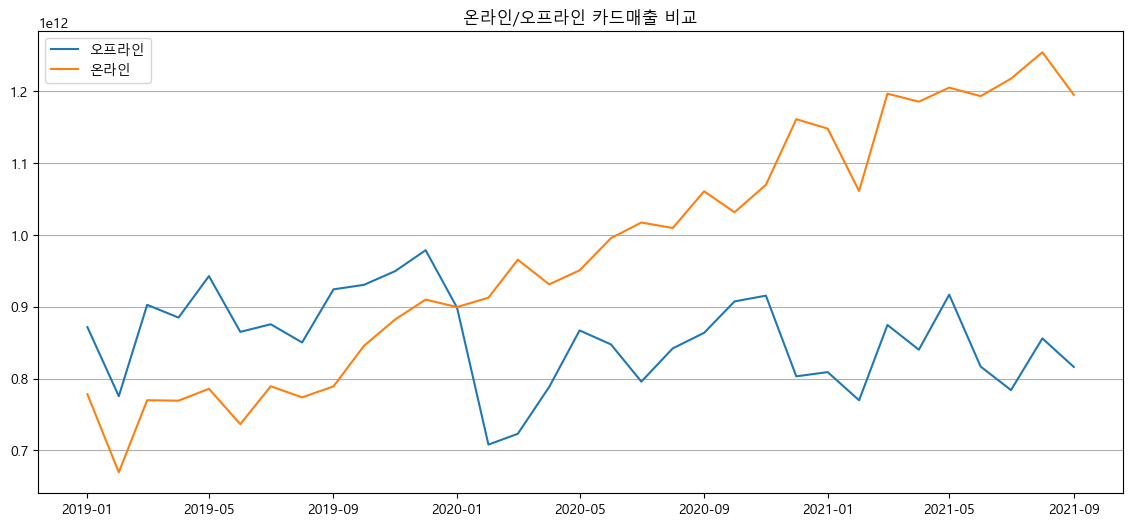

In [170]:
#그래프로 시각화

#그래프 사이즈 변경
plt.figure(figsize = (14,6))

#grid 추가
plt.grid(True, axis = 'y')

plt.plot(group_data, label = '오프라인')
plt.plot(group_data2, label = '온라인')
plt.title('온라인/오프라인 카드매출 비교')
plt.legend()
plt.show()

In [171]:
test

,업종,성별,연령대,총이용건수,총이용금액
기준연월,,,,,
2019-01-01,백화점,1,1,1,7600.000000
2019-01-01,백화점,1,10,379,19458720.000000
2019-01-01,백화점,1,20,45173,4747711001.000000
2019-01-01,백화점,1,30,271858,27918261543.000000
2019-01-01,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...
2021-09-01,편의점,2,50,844081,6283353303.000000
2021-09-01,편의점,2,60,243768,1997441975.000000
2021-09-01,편의점,2,70,40523,352420260.000000


In [172]:
df_online['업종'] = '온라인'

In [173]:
pd.concat([test, df_online], axis = 0)

,업종,성별,연령대,총이용건수,총이용금액
2019-01-01,백화점,1,1,1,7600.000000
2019-01-01,백화점,1,10,379,19458720.000000
2019-01-01,백화점,1,20,45173,4747711001.000000
2019-01-01,백화점,1,30,271858,27918261543.000000
2019-01-01,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...
2021-09-01,온라인,2,50,3237324,181360535814.000000
2021-09-01,온라인,2,60,1019719,70026626874.000000
2021-09-01,온라인,2,70,159261,13091029631.000000
2021-09-01,온라인,2,80,20094,1935122483.000000


In [174]:
df_online.columns_ = ['업종', '성별', '연령대', '총이용건수', '총이용금액']

C:\Users\user\AppData\Local\Temp\ipykernel_12768\2263784432.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_online.columns_ = ['업종', '성별', '연령대', '총이용건수', '총이용금액']


In [175]:
df_online

,성별,연령대,총이용건수,총이용금액,업종
기준년월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인
